In [1]:
import numpy as np
import pandas as pd
from regain.hmm.utils_portfolio_optimization import PO_with_HMM_GMM
from regain.datasets.hmm import generate_hmm
from regain.hmm.utils import cross_validation,results_recap
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso
import matplotlib.pyplot as plt
from sklearn.covariance import empirical_covariance
from regain.data.base import load_ETF_data

/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
#Generate Data

N_samples = 1000
N_states = 5
N_TS = 3
sigma_Normal = 1

dataset = generate_hmm(n_samples= N_samples,
                       n_states=N_states,
                       n_dim_obs=N_TS,
                       mode_precisions='regain_random',
                       mode_mean = 'Normal',
                       transition_type='fixed',
                       sigma=sigma_Normal)

[1002.33722379 1008.18932565 1008.11182023]


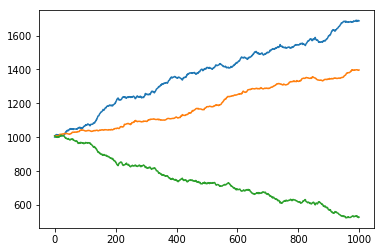

In [7]:
p_vec_0 = np.random.uniform(0,10,N_TS)+1000
Data = np.zeros((np.size(dataset['data'],axis=0),N_TS))
print(p_vec_0)
for j in range(N_TS):
    #print(p_vec_0[j])
    #print(np.cumsum(dataset['data'][:,j]))
    plt.plot(p_vec_0[j]+np.cumsum(dataset['data'][:,j]))
    Data[:,j] = p_vec_0[j]+np.cumsum(dataset['data'][:,j])
    
plt.show()

In [14]:
mdl = HMM_GraphicalLasso(alpha=40, n_clusters=N_states, verbose=False, mode='scaled',
                                     warm_restart=True, repetitions=5, n_jobs=-1)
mdl.fit(dataset['data'])

HMM_GraphicalLasso(alpha=40, init_params={}, max_iter=100, mode='scaled',
                   n_clusters=5, n_jobs=-1, repetitions=5, tol=0.0001,
                   verbose=False, warm_restart=True)

In [15]:
results_recap(dataset['states'], mdl.labels_, dataset['thetas'], mdl.precisions_, 
              dataset['gammas'], mdl.gammas_) 

{'homogeneity [0, 1]': 0.9262997743583167,
 'completeness [0, 1]': 0.923477257755385,
 'v_measure [0, 1]': 0.9248863626621888,
 'adjusted_mutual_info [0, 1]': 0.924490284772336,
 'weighted_mean_mcc [-1, 1]': (0.6532374559830562,),
 'max_cluster_mean_mcc[-1,1]': (0.6694853592467094,),
 'weighted_mean_f1 [0, 1]': (0.700955289250836,),
 'max_cluster_mean_f1[0,1]': (0.711025641025641,),
 'probabilities_clusters': (array([[0.        , 0.00704225, 0.00913242, 0.96958175, 0.03571429],
         [0.98947368, 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.99295775, 0.01369863, 0.01140684, 0.00714286],
         [0.01052632, 0.        , 0.        , 0.        , 0.95714286],
         [0.        , 0.        , 0.97716895, 0.01901141, 0.        ]]),),
 'max_probabilities_couples': ['Couple: (2, 1), Probability: 0.9929577464788732, MCC: 0.45226701686664544, F1_score: 0.7692307692307692',
  'Couple: (1, 0), Probability: 0.9894736842105263, MCC: 1.0, F1_score: 0.7499999999999999'

In [ ]:
PLpred,PLtod,PLemp = PO_with_HMM_GMM(dataset['data'],
                                     Data,
                                     [40],
                                     [N_states],
                                     N_test=20,
                                     Wealth=1e7,
                                     OP_method = 'Min_Var_Fix_return',
                                     N_max_mem = 980)

100%|██████████| 1/1 [07:11<00:00, 431.38s/it]


Pred changed cluster
Today changed cluster
entrato1
entrato2
entrato3
Price difference 4.386116513421257 N purchased pred 301.0 N purchased today 301.0 N purchased emp 2361.0
entrato1
entrato2
entrato3
Price difference -1.1555877740763663 N purchased pred 4441.0 N purchased today 4441.0 N purchased emp -188.0
entrato1
entrato2
entrato3
Price difference -3.25715321858263 N purchased pred 6130.0 N purchased today 6130.0 N purchased emp 11721.0
P&L predict [-23778.09346404]
P&L today [-23778.09346404]
P&L emp [-27604.22128529]


In [3]:
# load data ETF

data = load_ETF_data()
data = data[['SPY','IEF','TLT','HYG','DBC','VNQ']]

print(data)

             SPY         IEF         TLT        HYG        DBC        VNQ
0     111.483650   59.735962   58.628643  45.244141  24.097614  45.898468
1     111.979050   59.793949   58.641998  45.274448  24.239866  45.586102
2     112.489952   59.692425   58.460850  45.192112  24.372637  46.100918
3     113.558159   59.757679   58.782974  45.174736  24.182968  46.158764
4     113.860085   60.011406   59.111759  45.153080  23.936396  46.760323
...          ...         ...         ...        ...        ...        ...
3152  298.399994  111.889999  139.919998  86.949997  15.200000  93.199997
3153  299.279999  111.849998  139.580002  87.070000  15.260000  93.809998
3154  297.970001  111.949997  139.580002  87.089996  15.250000  94.529999
3155  299.989990  111.540001  138.529999  87.120003  15.230000  95.250000
3156  299.010010  111.800003  139.339996  87.139999  15.250000  94.970001

[3157 rows x 6 columns]


In [4]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data.values[i,:]-data.values[i-1,:])/data.values[i-1,:]*100

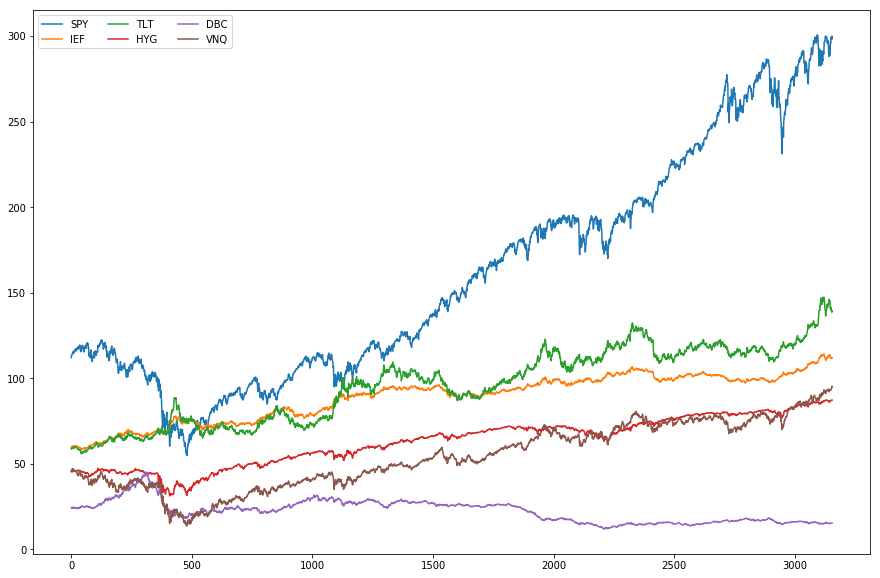

In [5]:
# Plot data

plt.figure(figsize= (15,10))
for i in range(data.shape[1]):
    plt.plot( data.values[1:, i], label = data.columns[i])
plt.legend(ncol=3)
plt.show()

In [6]:
N_backtest = 100
Invest_wealth = 1e5


PLpred,PLtod,PLemp = PO_with_HMM_GMM(returns_mat,
                                     data.values[1:,:],
                                     np.linspace(5,50,5),
                                     [2,3,4],
                                     N_test=N_backtest,
                                     Wealth=Invest_wealth,
                                     mu_p= 0.1,
                                     OP_method = 'Min_Var_Fix_return')

100%|██████████| 5/5 [1:08:14<00:00, 818.99s/it]


[0.10108838 0.01897166 0.04528906 0.03269421 0.00304368 0.10889715]
Price difference -0.6933899999999653 N purchased pred 216 N purchased today 215 N purchased emp 168
Price difference 0.5195080000000019 N purchased pred -142 N purchased today -135 N purchased emp 428
Price difference 0.8734429999999804 N purchased pred 141 N purchased today 288 N purchased emp 389
Price difference 0.13371999999999673 N purchased pred 220 N purchased today 99 N purchased emp -151
Price difference -0.05000000000000071 N purchased pred -472 N purchased today -797 N purchased emp -845
Price difference 0.2063449999999989 N purchased pred 312 N purchased today 257 N purchased emp -206
P&L predict [17.011127]
P&L today [138.458099]
P&L emp [425.180441]
[0.10016842 0.01901459 0.04454586 0.03260927 0.00319969 0.10950154]
Price difference 5.903899999999965 N purchased pred 215 N purchased today 215 N purchased emp 125
Price difference -0.39733900000000233 N purchased pred -136 N purchased today -136 N purchased

  0%|          | 0/3 [00:00<?, ?it/s]

[0.10607411 0.01994983 0.04789767 0.03482164 0.00567647 0.11585287]
Price difference -0.3169250000000261 N purchased pred 185 N purchased today 185 N purchased emp 115
Price difference 0.07945999999998321 N purchased pred -108 N purchased today -108 N purchased emp 568
Price difference 0.32754499999998643 N purchased pred 277 N purchased today 277 N purchased emp 198
Price difference -0.058983000000012 N purchased pred 131 N purchased today 131 N purchased emp 249
Price difference 0.05999999999999872 N purchased pred -695 N purchased today -695 N purchased emp -1440
Price difference 0.04912600000000111 N purchased pred 248 N purchased today 248 N purchased emp -226
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345]
P&L today [ 138.458099  932.070015 1941.667099 2006.059851 2903.903418 2864.302591
 2870.829308 2953.014275 3244.890101 3231.163736]
P&L emp [ 425.180441  533.615875  608.639827  472.32426  139


100%|██████████| 5/5 [1:06:21<00:00, 796.27s/it]


[0.11273981 0.02016253 0.0480314  0.0379383  0.01388508 0.12341019]
Price difference 0.10891700000001947 N purchased pred 171 N purchased today 171 N purchased emp 86
Price difference -0.01985899999999674 N purchased pred -90 N purchased today -90 N purchased emp 354
Price difference 0.22828699999999458 N purchased pred 251 N purchased today 251 N purchased emp 288
Price difference -0.12782300000000646 N purchased pred 164 N purchased today 164 N purchased emp 384
Price difference -0.07000000000000028 N purchased pred -494 N purchased today -494 N purchased emp -1047
Price difference 0.9433050000000094 N purchased pred 245 N purchased today 245 N purchased emp -198
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252]
P&L today [ 138.458099  932.070015 1941.667099 2006.059851 2903.903418 2864.302591
 2870.829308 2953.014275 3244.890101 3231.163736 3553.602643]
P&L emp [ 425.180441  533.615875  60

[0.10870102 0.02150066 0.05124502 0.03697585 0.01480131 0.11539041]
Price difference -0.28869600000001583 N purchased pred 181 N purchased today 181 N purchased emp 89
Price difference -0.44699900000000525 N purchased pred -118 N purchased today -118 N purchased emp 954
Price difference -0.8436740000000214 N purchased pred 288 N purchased today 288 N purchased emp -27
Price difference -0.03931400000000451 N purchased pred 128 N purchased today 128 N purchased emp -45
Price difference 0.08000000000000007 N purchased pred -562 N purchased today -562 N purchased emp -342
Price difference -1.7391959999999926 N purchased pred 232 N purchased today 232 N purchased emp -199
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641]
P&L today [ 138.458099  932.070015 1941.667099 2006.059851 2903.903418 2864.302591
 2870.82930

  0%|          | 0/3 [00:00<?, ?it/s]

[0.11163785 0.02294961 0.05487857 0.0379252  0.01417206 0.11951608]
Price difference 1.4931030000000192 N purchased pred 171 N purchased today 171 N purchased emp 86
Price difference 0.04966699999998525 N purchased pred -81 N purchased today -81 N purchased emp 811
Price difference -0.08931000000001177 N purchased pred 275 N purchased today 275 N purchased emp 58
Price difference 0.029488000000000625 N purchased pred 141 N purchased today 141 N purchased emp 9
Price difference -0.16999999999999993 N purchased pred -548 N purchased today -548 N purchased emp -324
Price difference 0.2976149999999933 N purchased pred 223 N purchased today 223 N purchased emp -196
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931 ]
P&L today [ 138.458099  932.070015 1941.667099 2006.059851 2903.903418 2864.


100%|██████████| 5/5 [1:02:43<00:00, 752.68s/it]


[0.11151094 0.02343026 0.05583342 0.03759912 0.01300514 0.11920991]
Price difference 2.6477969999999686 N purchased pred 171 N purchased today 171 N purchased emp 86
Price difference -0.13731399999998928 N purchased pred -72 N purchased today -72 N purchased emp 809
Price difference -0.30831900000001156 N purchased pred 274 N purchased today 274 N purchased emp 48
Price difference 0.025679999999994152 N purchased pred 134 N purchased today 134 N purchased emp 15
Price difference -0.009999999999999787 N purchased pred -560 N purchased today -560 N purchased emp -372
Price difference -0.039679999999989946 N purchased pred 219 N purchased today 219 N purchased emp -178
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999]
P&L today [ 138.458099  932.070015 1941.667099 2006.059851

[0.10980058 0.02200649 0.05187983 0.03756507 0.01566638 0.11973293]
Price difference 1.4134520000000066 N purchased pred 172 N purchased today 172 N purchased emp 144
Price difference 0.05970700000000306 N purchased pred -100 N purchased today -100 N purchased emp 760
Price difference -0.7259830000000136 N purchased pred 275 N purchased today 275 N purchased emp 182
Price difference 0.23701399999998785 N purchased pred 137 N purchased today 137 N purchased emp -375
Price difference 0.34000000000000163 N purchased pred -549 N purchased today -549 N purchased emp -358
Price difference 0.515876999999989 N purchased pred 229 N purchased today 229 N purchased emp -131
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 3

  0%|          | 0/3 [00:00<?, ?it/s]

[0.11129162 0.02199127 0.0505327  0.03958929 0.02168971 0.11910788]
Price difference 0.09954800000002706 N purchased pred 170 N purchased today 170 N purchased emp 222
Price difference 0.2288589999999857 N purchased pred -126 N purchased today -126 N purchased emp 1452
Price difference 0.7458650000000091 N purchased pred 283 N purchased today 283 N purchased emp -123
Price difference 0.05924999999999159 N purchased pred 159 N purchased today 159 N purchased emp -1046
Price difference -0.16999899999999712 N purchased pred -480 N purchased today -480 N purchased emp -138
Price difference -0.0694429999999926 N purchased pred 228 N purchased today 228 N purchased emp -181
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731


100%|██████████| 5/5 [1:03:13<00:00, 758.68s/it]


[ 0.46540123 -0.16230298 -0.39529079  0.24455634  0.09536303  0.25118088]
Price difference -0.9655450000000201 N purchased pred 168 N purchased today 168 N purchased emp 170
Price difference -0.2388159999999857 N purchased pred -114 N purchased today -114 N purchased emp 1394
Price difference -0.38783300000000054 N purchased pred 269 N purchased today 269 N purchased emp -170
Price difference -0.1777569999999855 N purchased pred 161 N purchased today 161 N purchased emp -774
Price difference -0.16999999999999993 N purchased pred -484 N purchased today -484 N purchased emp 68
Price difference -0.20832800000000873 N purchased pred 231 N purchased today 231 N purchased emp -169
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3

[0.11022285 0.02105592 0.0479427  0.03849728 0.02200269 0.11425218]
Price difference 2.1202090000000453 N purchased pred 185 N purchased today 185 N purchased emp 180
Price difference -0.17910700000001611 N purchased pred -143 N purchased today -143 N purchased emp 1237
Price difference -0.7160339999999792 N purchased pred 284 N purchased today 284 N purchased emp -88
Price difference 0.14813999999999794 N purchased pred 137 N purchased today 137 N purchased emp -622
Price difference 0.09999999999999964 N purchased pred -496 N purchased today -496 N purchased emp -192
Price difference 0.9821319999999929 N purchased pred 222 N purchased today 222 N purchased emp -239
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.73147

  0%|          | 0/3 [00:00<?, ?it/s]

[0.12143187 0.01600391 0.03817134 0.0437327  0.03349851 0.11529959]
Price difference -0.5474859999999921 N purchased pred 172 N purchased today 172 N purchased emp 169
Price difference 0.09950299999999856 N purchased pred -174 N purchased today -174 N purchased emp 1075
Price difference 0.03977899999998158 N purchased pred 238 N purchased today 238 N purchased emp -99
Price difference -0.12837900000000957 N purchased pred 291 N purchased today 291 N purchased emp -283
Price difference 0.0600000000000005 N purchased pred -369 N purchased today -369 N purchased emp -481
Price difference 0.23809099999999717 N purchased pred 188 N purchased today 188 N purchased emp -263
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.7314


100%|██████████| 5/5 [1:02:19<00:00, 747.92s/it]


[0.11515886 0.00783334 0.01458029 0.03692441 0.0315527  0.0732836 ]
Price difference -0.7366030000000023 N purchased pred 264 N purchased today 264 N purchased emp 180
Price difference 0.049751000000000545 N purchased pred -122 N purchased today -122 N purchased emp 1178
Price difference 0.31825299999999856 N purchased pred 149 N purchased today 149 N purchased emp -114
Price difference 0.03950500000000545 N purchased pred 212 N purchased today 212 N purchased emp -432
Price difference 0.08999999999999986 N purchased pred -442 N purchased today -442 N purchased emp -441
Price difference 0.7043530000000118 N purchased pred 34 N purchased today 34 N purchased emp -269
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.73147

[0.11100414 0.00899068 0.01780369 0.03709505 0.02846622 0.07286403]
Price difference -8.759551999999985 N purchased pred 276 N purchased today 276 N purchased emp 154
Price difference 0.9569389999999913 N purchased pred -195 N purchased today -195 N purchased emp 1051
Price difference 2.3517149999999845 N purchased pred 178 N purchased today 178 N purchased emp -50
Price difference -0.892571000000018 N purchased pred 251 N purchased today 251 N purchased emp -498
Price difference -0.13000000000000078 N purchased pred -538 N purchased today -538 N purchased emp 105
Price difference -1.7460169999999948 N purchased pred 39 N purchased today 39 N purchased emp -152
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 376

[0.11625336 0.00853363 0.01735131 0.03926159 0.03116643 0.07637858]
Price difference -1.9908140000000003 N purchased pred 258 N purchased today 258 N purchased emp 118
Price difference -0.16946399999999073 N purchased pred -164 N purchased today -164 N purchased emp 973
Price difference -0.2790069999999787 N purchased pred 158 N purchased today 158 N purchased emp -86
Price difference -0.11901099999998621 N purchased pred 287 N purchased today 287 N purchased emp -261
Price difference 0.129999999999999 N purchased pred -475 N purchased today -475 N purchased emp -62
Price difference -0.10912299999999675 N purchased pred 35 N purchased today 35 N purchased emp -92
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 3

  0%|          | 0/3 [00:00<?, ?it/s]

[0.11410016 0.00867517 0.01774231 0.03869712 0.03099297 0.07570493]
Price difference -3.533660999999995 N purchased pred 265 N purchased today 265 N purchased emp 146
Price difference 0.7077329999999904 N purchased pred -189 N purchased today -189 N purchased emp 944
Price difference 2.90975899999998 N purchased pred 169 N purchased today 169 N purchased emp -19
Price difference -0.2975229999999982 N purchased pred 280 N purchased today 280 N purchased emp -442
Price difference -0.10999999999999943 N purchased pred -472 N purchased today -472 N purchased emp 16
Price difference -0.2380899999999997 N purchased pred 39 N purchased today 39 N purchased emp -84
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 3765.17


100%|██████████| 5/5 [1:02:47<00:00, 753.45s/it]


[0.11187395 0.01897762 0.04586268 0.04172762 0.03029631 0.11337599]
Price difference 4.459381000000008 N purchased pred 179 N purchased today 179 N purchased emp 133
Price difference -0.3987199999999973 N purchased pred -246 N purchased today -246 N purchased emp 763
Price difference -0.48828100000000063 N purchased pred 283 N purchased today 283 N purchased emp 47
Price difference 0.376868999999985 N purchased pred 269 N purchased today 269 N purchased emp -267
Price difference 0.34999999999999964 N purchased pred -400 N purchased today -400 N purchased emp 101
Price difference 0.12895900000000893 N purchased pred 209 N purchased today 209 N purchased emp -104
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 376

[0.10289172 0.02398664 0.05634061 0.0376672  0.02493774 0.11491074]
Price difference 3.4639889999999696 N purchased pred 172 N purchased today 172 N purchased emp 109
Price difference -0.5382840000000044 N purchased pred -237 N purchased today -237 N purchased emp 730
Price difference -2.0826870000000213 N purchased pred 327 N purchased today 327 N purchased emp 71
Price difference 0.24793999999999983 N purchased pred 168 N purchased today 168 N purchased emp -252
Price difference 0.07000000000000028 N purchased pred -419 N purchased today -419 N purchased emp 507
Price difference 0.6547470000000004 N purchased pred 238 N purchased today 238 N purchased emp -116
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 37

[0.10149168 0.02490949 0.05728893 0.03688762 0.01549392 0.11318651]
Price difference -0.08959900000002108 N purchased pred 172 N purchased today 172 N purchased emp 138
Price difference -0.24919899999999018 N purchased pred -209 N purchased today -209 N purchased emp 813
Price difference -0.9566190000000176 N purchased pred 327 N purchased today 327 N purchased emp 75
Price difference 0.15867600000001403 N purchased pred 162 N purchased today 162 N purchased emp -493
Price difference -0.07000000000000028 N purchased pred -608 N purchased today -608 N purchased emp 576
Price difference 0.4166570000000007 N purchased pred 234 N purchased today 234 N purchased emp -101
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.73147

  0%|          | 0/3 [00:00<?, ?it/s]

[ 1.37313619 -0.1725623  -0.3538522   0.78897506  0.58424218  1.19803672]
Price difference 3.135497999999984 N purchased pred 145 N purchased today -23 N purchased emp 74
Price difference -0.10965000000000202 N purchased pred -227 N purchased today 724 N purchased emp 312
Price difference -0.5879520000000014 N purchased pred 186 N purchased today -14 N purchased emp 231
Price difference 0.4264519999999976 N purchased pred 373 N purchased today 307 N purchased emp 166
Price difference -0.009999999999999787 N purchased pred -595 N purchased today 218 N purchased emp 349
Price difference 0.6944420000000093 N purchased pred 380 N purchased today -34 N purchased emp -106
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.73147


100%|██████████| 5/5 [1:05:27<00:00, 785.52s/it]


[0.1022061  0.02425603 0.05575929 0.03729404 0.01364598 0.11448404]
Price difference -1.1247859999999719 N purchased pred 173 N purchased today 173 N purchased emp 64
Price difference 0.48844199999999205 N purchased pred -197 N purchased today -197 N purchased emp 206
Price difference 2.2321469999999977 N purchased pred 310 N purchased today 310 N purchased emp 241
Price difference -0.039664999999999395 N purchased pred 178 N purchased today 178 N purchased emp 390
Price difference 0.09999999999999964 N purchased pred -650 N purchased today -650 N purchased emp 39
Price difference -0.2579340000000201 N purchased pred 240 N purchased today 240 N purchased emp -121
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 3

[0.10561747 0.02462336 0.05702573 0.03793392 0.0169308  0.11707144]
Price difference -0.12939499999998816 N purchased pred 167 N purchased today 167 N purchased emp 113
Price difference 0.029907000000008566 N purchased pred -162 N purchased today -162 N purchased emp 405
Price difference 0.03984000000002652 N purchased pred 292 N purchased today 292 N purchased emp 206
Price difference -0.07933800000000701 N purchased pred 161 N purchased today 161 N purchased emp 7
Price difference -0.2400000000000002 N purchased pred -549 N purchased today -549 N purchased emp 366
Price difference 0.0694429999999926 N purchased pred 229 N purchased today 229 N purchased emp -170
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 

[0.10419488 0.02621406 0.0604942  0.03851711 0.01586856 0.11576585]
Price difference 3.7626040000000103 N purchased pred 163 N purchased today 163 N purchased emp 86
Price difference -0.9186019999999928 N purchased pred -167 N purchased today -167 N purchased emp 539
Price difference -2.665329000000014 N purchased pred 302 N purchased today 302 N purchased emp 138
Price difference 0.33863100000000657 N purchased pred 170 N purchased today 170 N purchased emp -124
Price difference -0.019999999999999574 N purchased pred -574 N purchased today -574 N purchased emp 198
Price difference -0.6745910000000066 N purchased pred 220 N purchased today 220 N purchased emp 3
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 376

  0%|          | 0/3 [00:00<?, ?it/s]

[0.10612037 0.01937569 0.04542072 0.03807125 0.01884688 0.09542137]
Price difference -0.06967099999997117 N purchased pred 215 N purchased today 215 N purchased emp 32
Price difference -0.8187560000000076 N purchased pred -266 N purchased today -266 N purchased emp 51
Price difference -2.505599999999987 N purchased pred 331 N purchased today 331 N purchased emp 238
Price difference 0.04979699999999809 N purchased pred 179 N purchased today 179 N purchased emp 474
Price difference 0.019999999999999574 N purchased pred -651 N purchased today -651 N purchased emp -349
Price difference -0.9523700000000019 N purchased pred 141 N purchased today 141 N purchased emp 157
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 3


100%|██████████| 5/5 [1:03:49<00:00, 765.83s/it]


[0.10326897 0.02157953 0.05112092 0.03740718 0.01614948 0.09424789]
Price difference 2.110229000000004 N purchased pred 212 N purchased today 85 N purchased emp -43
Price difference -0.10983199999998305 N purchased pred -277 N purchased today 464 N purchased emp -683
Price difference -0.24955700000001002 N purchased pred 369 N purchased today -221 N purchased emp 441
Price difference -0.009964000000010742 N purchased pred 167 N purchased today 573 N purchased emp 1359
Price difference -0.10999999999999943 N purchased pred -685 N purchased today 370 N purchased emp -579
Price difference 0.09920499999999777 N purchased pred 132 N purchased today -18 N purchased emp 195
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.7314

[0.10579887 0.01677306 0.03885197 0.03772321 0.01740483 0.09064287]
Price difference -0.9257199999999557 N purchased pred 226 N purchased today 226 N purchased emp -158
Price difference 0.47927900000000534 N purchased pred -299 N purchased today -299 N purchased emp -2182
Price difference 1.7369689999999878 N purchased pred 333 N purchased today 333 N purchased emp 839
Price difference 0.3087539999999933 N purchased pred 219 N purchased today 219 N purchased emp 3460
Price difference 0.6699999999999999 N purchased pred -750 N purchased today -750 N purchased emp -3545
Price difference 0.7936400000000106 N purchased pred 132 N purchased today 132 N purchased emp 299
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479

[0.10489778 0.01791618 0.04181744 0.03905831 0.01790023 0.09222368]
Price difference -0.019927999999993062 N purchased pred 215 N purchased today 215 N purchased emp -101
Price difference 0.04992699999998251 N purchased pred -347 N purchased today -347 N purchased emp -1206
Price difference 0.4192649999999958 N purchased pred 347 N purchased today 347 N purchased emp 551
Price difference -0.09960100000000693 N purchased pred 280 N purchased today 280 N purchased emp 2318
Price difference 0.08000000000000007 N purchased pred -731 N purchased today -731 N purchased emp -1074
Price difference 0.3273690000000187 N purchased pred 134 N purchased today 134 N purchased emp 23
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.73

  0%|          | 0/3 [00:00<?, ?it/s]

[0.10105507 0.01787411 0.04264794 0.03890574 0.01716702 0.08976795]
Price difference -2.339995999999985 N purchased pred 217 N purchased today 217 N purchased emp -118
Price difference 0.5591429999999917 N purchased pred -415 N purchased today -415 N purchased emp -553
Price difference 1.7070159999999817 N purchased pred 372 N purchased today 372 N purchased emp 281
Price difference -0.11952300000000093 N purchased pred 321 N purchased today 321 N purchased emp 1761
Price difference -0.17999999999999972 N purchased pred -754 N purchased today -754 N purchased emp -704
Price difference -0.20600100000000054 N purchased pred 136 N purchased today 136 N purchased emp 161
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.7314


100%|██████████| 5/5 [1:02:48<00:00, 753.74s/it]


[0.09988363 0.01868897 0.0445773  0.03862786 0.01594791 0.0896045 ]
Price difference 1.75 N purchased pred 218 N purchased today 218 N purchased emp -124
Price difference -0.7388760000000048 N purchased pred -419 N purchased today -419 N purchased emp -509
Price difference -2.0963289999999972 N purchased pred 378 N purchased today 378 N purchased emp 264
Price difference -0.08963699999999619 N purchased pred 321 N purchased today 321 N purchased emp 1729
Price difference -0.08999999999999986 N purchased pred -789 N purchased today -789 N purchased emp -671
Price difference 0.18000000000000682 N purchased pred 135 N purchased today 135 N purchased emp 173
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 3765.17594

[0.09944231 0.01811651 0.0433903  0.03820099 0.01475835 0.08942204]
Price difference 1.3699950000000172 N purchased pred 220 N purchased today 220 N purchased emp -163
Price difference 0.08986699999999814 N purchased pred -421 N purchased today -421 N purchased emp -625
Price difference 0.3493960000000129 N purchased pred 377 N purchased today 377 N purchased emp 252
Price difference 0.0996019999999902 N purchased pred 323 N purchased today 323 N purchased emp 1899
Price difference -0.15000000000000036 N purchased pred -833 N purchased today -833 N purchased emp -533
Price difference 0.1600040000000007 N purchased pred 138 N purchased today 138 N purchased emp 278
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 

[0.09496792 0.01899618 0.04467387 0.03708139 0.01296948 0.08642282]
Price difference 2.3600149999999758 N purchased pred 232 N purchased today 232 N purchased emp -184
Price difference 0.5899959999999993 N purchased pred -465 N purchased today -465 N purchased emp -232
Price difference 1.3099969999999814 N purchased pred 409 N purchased today 409 N purchased emp 111
Price difference 0.050003000000003794 N purchased pred 314 N purchased today 314 N purchased emp 1578
Price difference -0.019999999999999574 N purchased pred -936 N purchased today -936 N purchased emp -702
Price difference 0.8900000000000006 N purchased pred 148 N purchased today 148 N purchased emp 411
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.73147

  0%|          | 0/3 [00:00<?, ?it/s]

[ 1.37025865 -0.16712297 -0.33064677  0.77376771  0.5420339   1.20620037]
Price difference -4.549987999999985 N purchased pred 225 N purchased today 225 N purchased emp -138
Price difference 0.23999799999998572 N purchased pred -441 N purchased today -441 N purchased emp -2
Price difference 0.3899989999999889 N purchased pred 386 N purchased today 386 N purchased emp 68
Price difference -0.3199999999999932 N purchased pred 315 N purchased today 315 N purchased emp 1133
Price difference -0.009999999999999787 N purchased pred -895 N purchased today -895 N purchased emp -423
Price difference -0.49000499999999647 N purchased pred 152 N purchased today 152 N purchased emp 425
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.


100%|██████████| 5/5 [1:05:18<00:00, 783.70s/it]


[0.09368733 0.01943276 0.0451256  0.03629805 0.0138337  0.08629254]
Price difference 2.7399899999999775 N purchased pred 234 N purchased today 234 N purchased emp -159
Price difference -0.2900009999999895 N purchased pred -467 N purchased today -467 N purchased emp -41
Price difference -0.819991999999985 N purchased pred 408 N purchased today 408 N purchased emp 65
Price difference 0.26000200000000007 N purchased pred 288 N purchased today 288 N purchased emp 1276
Price difference 0.03999999999999915 N purchased pred -922 N purchased today -922 N purchased emp -462
Price difference 0.1799999999999926 N purchased pred 162 N purchased today 162 N purchased emp 412
P&L predict [  17.011127  810.623043 1820.220127 1925.27946  2823.123027 2783.5222
 2790.048917 2872.233884 3164.10971  3150.383345 3472.822252 4106.275044
 4440.958745 4973.98867  4198.618244 4141.345333 3308.712511 2612.740641
 2592.856021 2983.27931  3361.810999 4234.987773 4460.159703 3845.660381
 3681.714263 3763.731479 37

KeyboardInterrupt: 

In [11]:
def SPY_comparison(spy, N_test=10, Wealth=1e5):
    prices = spy[-N_test:].values
    N_purchased = int(Wealth/prices[0])
    returns = np.diff(prices)
    PL = returns * N_purchased
    PLtot = np.cumsum(PL)

    return (PLtot) 

In [12]:
spy = data['SPY']
SPY_comparison(spy, N_test=N_backtest, Wealth=Invest_wealth)

array([ 2166.7313  ,  3050.138835,  3719.055789,  4755.163216,
        5235.047645,  5209.601333,  5024.197337,  5456.795284,
        5340.483809,  5380.456348,  6482.00538 ,  6721.941906,
        7739.871823,  7583.520648,  7452.010602,  6399.909682,
        6293.95825 ,  6670.231606,  7218.200407,  8189.941906,
        8471.228689,  9337.018389,  9212.810909,  8613.703227,
        8748.864189,  9267.601073,  9523.329609, 10012.845953,
       10049.380069,  9695.025054,  8949.780174,  9347.971871,
        8741.56199 ,  9008.232631,  9786.349334, 10301.446312,
        9775.395852, 10509.675873, 10308.748511, 10038.41521 ,
        8836.537553,  7890.376688,  7079.388162,  3864.632578,
        5318.576845,  5380.680585,  7444.697026,  6714.068288,
        5417.214701,  7053.807528,  3893.853485,  4167.837702,
        5702.152767,  6973.43673 ,  6155.146005,  7017.284422,
        6984.401589,  4240.906301,  5391.634067,  4978.837605,
        5716.768542,  7064.772387,  7017.284422,  6392.